In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
import shap

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


In [ ]:
data = pd.read_csv('cleandata.csv')
data = data.drop(data.columns[0], axis=1)
X = data.drop('death', axis=1)
y = data['death']

cat_columns = ['sex', 'race', 'dnr', 'primary', 'disability', 'income', 'extraprimary', 'cancer']



In [ ]:
data

,timeknown,cost,reflex,sex,blood,bloodchem1,bloodchem2,temperature,race,heart,...,diabetes,income,extraprimary,bloodchem6,education,psych5,psych6,information,cancer,death
0,4.0,3008.38867,11.228005,1,20.699219,2.199707,1.299805,35.59375,3.0,103.0,...,0.0,0.0,1,167.5000,20.0,30.0,2.000,0.0,1,1.0
1,467.0,23585.89060,9.714861,1,9.398438,NaN,0.699951,39.00000,3.0,50.0,...,0.0,2.0,2,480.0000,16.0,11.5,1.000,10.0,0,1.0
2,533.0,4046.45898,11.353296,1,19.296875,NaN,1.599854,38.19531,3.0,50.0,...,1.0,4.0,0,177.1250,5.0,18.0,0.000,5.0,2,0.0
3,68.0,NaN,9.269058,0,7.500000,2.500000,0.599976,37.59375,3.0,80.0,...,0.0,0.0,1,NaN,12.0,7.0,1.839,12.0,1,1.0
4,1605.0,6457.70703,8.655387,0,15.099609,4.399414,0.699951,35.69531,3.0,114.0,...,0.0,4.0,1,233.3125,2.0,7.0,6.000,12.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6011,421.0,NaN,9.350148,1,7.799805,NaN,0.699951,36.59375,3.0,74.0,...,0.0,NaN,2,NaN,7.0,10.0,0.000,12.0,0,1.0
6012,841.0,18825.79690,10.897551,0,15.099609,NaN,0.899902,38.00000,1.0,150.0,...,0.0,1.0,3,371.3750,17.0,17.0,5.000,11.0,1,0.0
6013,258.0,68911.87500,10.325173,1,7.500000,3.199707,0.899902,37.59375,3.0,112.0,...,0.0,2.0,0,122.4375,20.0,24.5,0.000,48.0,0,1.0
6014,1325.0,15684.64840,9.838906,0,35.000000,2.799805,0.599976,36.59375,3.0,126.0,...,0.0,4.0,1,240.0000,NaN,32.5,0.000,11.0,1,0.0


In [ ]:
X[cat_columns] = X[cat_columns].astype("category")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.dtypes

timeknown             float64
cost                  float64
reflex                float64
sex                  category
blood                 float64
bloodchem1            float64
bloodchem2            float64
temperature           float64
race                 category
heart                 float64
psych1                float64
glucose               float64
psych2                float64
dose                    int64
psych3                float64
bp                    float64
bloodchem3            float64
confidence            float64
bloodchem4            float64
comorbidity           float64
totalcost             float64
breathing             float64
age                   float64
sleep                 float64
dnr                  category
bloodchem5            float64
pdeath                float64
meals                 float64
pain                  float64
primary              category
psych4                float64
disability           category
administratorcost     float64
urine     

In [ ]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 3234, number of negative: 1578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4533
[LightGBM] [Info] Number of data points in the train set: 4812, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.672070 -> initscore=0.717562
[LightGBM] [Info] Start training from score 0.717562


LGBMClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([1., 0., 1., ..., 0., 1., 1.])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
norm_conf_matrix = confusion_matrix(y_test,y_pred,normalize='true')


In [ ]:
accuracy

0.9194352159468439

In [ ]:
conf_matrix

array([[368,  30],
       [ 67, 739]])

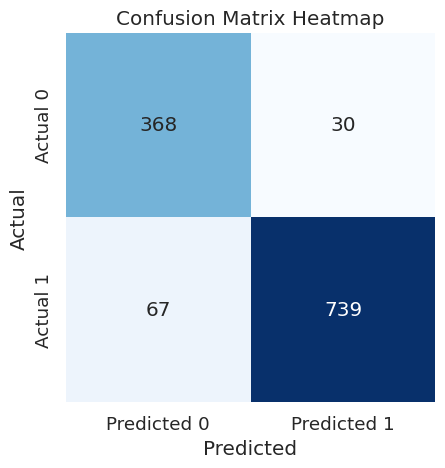

In [ ]:
sns.set(font_scale=1.2)

# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])

# Add labels and a title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')

# Display the plot
plt.show()

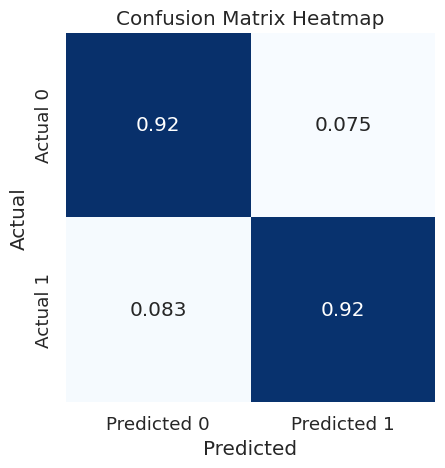

In [ ]:
sns.set(font_scale=1.2)

# Create a heatmap of the confusion matrix
sns.heatmap(norm_conf_matrix, annot=True, cmap="Blues", cbar=False, square=True,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])

# Add labels and a title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')

# Display the plot
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

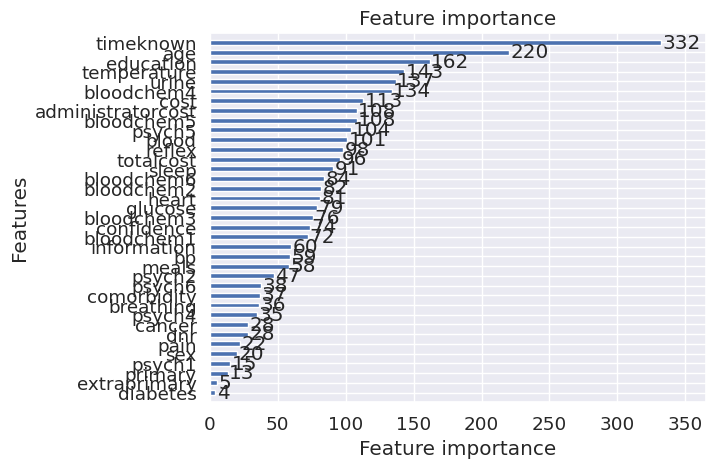

In [ ]:
#feature importances
# TODO
# Use SHAP to determine feature importance
lgb.plot_importance(model, height = 0.5)